1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:
1.	Which are the teams which started playing between 1930-1980?
2.	Which are the top 5 teams in terms of points?
3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)
4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.



In [1]:
import pandas as pd
import numpy as np

In [41]:
laliga=pd.read_csv("C:\\Users\\DELL\\Desktop\\PGPDSE\\Statistics\\Laliga.csv")

In [42]:
laliga.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [5]:
laliga.shape

(62, 20)

In [6]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 20 columns):
Unnamed: 0     62 non-null object
Unnamed: 1     62 non-null object
Unnamed: 2     62 non-null object
Unnamed: 3     62 non-null object
Unnamed: 4     62 non-null object
Unnamed: 5     62 non-null object
Unnamed: 6     62 non-null object
Unnamed: 7     62 non-null object
Unnamed: 8     62 non-null object
Unnamed: 9     62 non-null object
Unnamed: 10    62 non-null object
Unnamed: 11    62 non-null object
Unnamed: 12    62 non-null object
Unnamed: 13    62 non-null object
Unnamed: 14    62 non-null object
Unnamed: 15    62 non-null object
Unnamed: 16    62 non-null object
Unnamed: 17    62 non-null object
Unnamed: 18    62 non-null object
Unnamed: 19    62 non-null object
dtypes: object(20)
memory usage: 9.8+ KB


In [9]:
laliga.isnull().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
Unnamed: 11    0
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    0
Unnamed: 15    0
Unnamed: 16    0
Unnamed: 17    0
Unnamed: 18    0
Unnamed: 19    0
dtype: int64

In [43]:
laliga1=laliga.copy()

In [44]:
laliga1.columns = laliga.iloc[0]

In [45]:
laliga1

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
7,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,-,-,4,5,2,5,16,1929,1994-95,3
8,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
9,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,18,1939-40,2012-13,2


In [46]:
laliga1=laliga1.reindex(laliga1.index.drop(0))

In [48]:
laliga1['Debut'] = laliga1['Debut'].astype(str).str[:4].astype(int)

In [49]:
laliga1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 20 columns):
Pos              61 non-null object
Team             61 non-null object
Seasons          61 non-null object
Points           61 non-null object
GamesPlayed      61 non-null object
GamesWon         61 non-null object
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null int32
Since/LastApp    61 non-null object
BestPosition     61 non-null object
dtypes: int32(1), object(19)
memory usage: 9.8+ KB


In [50]:
laliga1.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [51]:
laliga_bet = laliga1[laliga1['Debut'].between(1930, 1980)]

In [52]:
laliga_bet

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987-88,1
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934,2001-02,1
9,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,18,1939,2012-13,2
10,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,-,2,3,4,4,14,1932,2015-16,1
11,11,Deportivo La Coruna,45,1814,1530,563,392,575,2052,2188,1,5,4,1,-,1,12,1941,2014-15,1
12,12,Celta Vigo,51,1789,1698,586,389,723,2278,2624,-,-,-,2,4,5,11,1939,2012-13,4
13,13,Valladolid,42,1471,1466,463,384,619,1767,2180,-,-,-,1,1,1,3,1948,2013-14,4
15,15,Sporting Gijon,43,1389,1458,471,358,629,1753,2152,-,1,1,2,2,1,7,1944,2015-16,2
16,16,Osasuna,37,1351,1318,426,327,565,1500,1834,-,-,-,2,2,2,6,1935,2016-17,4
17,17,Malaga,36,1314,1255,390,330,535,1421,1763,-,-,-,1,-,1,2,1949,2008-09,4


In [53]:
laliga_bet.shape

(37, 20)

In [68]:
laliga1['Points']=laliga1['Points'].str.replace('-',' ')

In [70]:
laliga1['GamesPlayed']=laliga1['GamesPlayed'].str.replace('-',' ')
laliga1['GamesWon']=laliga1['GamesWon'].str.replace('-',' ')
laliga1['GamesDrawn']=laliga1['GamesDrawn'].str.replace('-',' ')
laliga1['GamesLost']=laliga1['GamesLost'].str.replace('-',' ')
laliga1['GoalsFor']=laliga1['GoalsFor'].str.replace('-',' ')
laliga1['GoalsAgainst']=laliga1['GoalsAgainst'].str.replace('-',' ')
laliga1['Champion']=laliga1['Champion'].str.replace('-',' ')
laliga1['Runner-up']=laliga1['Runner-up'].str.replace('-',' ')
laliga1['Third']=laliga1['Third'].str.replace('-',' ')
laliga1['Fourth']=laliga1['Fourth'].str.replace('-',' ')
laliga1['Fifth']=laliga1['Fifth'].str.replace('-',' ')
laliga1['Sixth']=laliga1['Sixth'].str.replace('-',' ')
laliga1['T']=laliga1['T'].str.replace('-',' ')


In [77]:
laliga1["Points"]=laliga1["Points"].astype(str)

In [83]:
laliga1["Points"]=laliga1["Points"].replace(' ', '')

In [86]:
laliga1["Points"]=laliga1["Points"].astype(dtype="int",errors="ignore")

In [88]:
laliga1.sort_values("Points").head() 

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
61,61,Girona,1,,,,,,,,,,,,,,,2017,2017-18,9
20,20,Las Palmas,33,1020,1096,367,242,487,1347,1746,,1,1,1,1,1,5,1951,2015-16,2
45,45,Arenas,7,107,130,43,21,66,227,308,,,1,,3,,4,1929,1934-35,3
19,19,Mallorca,27,1148,988,333,256,399,1182,1371,,,2,,2,1,5,1960,2012-13,3
18,18,Oviedo,38,1174,1192,408,292,492,1642,1951,,,3,2,2,4,11,1933,2000-01,3


In [100]:
laliga1=laliga1.replace('', 0)

In [101]:
laliga1["GamesWon"]=laliga1["GamesWon"].astype(str).astype(int)

In [102]:
laliga1["GamesPlayed"]=laliga1["GamesPlayed"].astype(str).astype(int)

In [107]:
laliga1["Winning percentage"]= laliga1["GamesWon"] / laliga1["GamesPlayed"]*100


In [118]:
laliga_win=laliga1.sort_values("Winning percentage", ascending=False).head(10) 

In [132]:
laliga_win

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Winning percentage
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,47.475134
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931,1987-88,1,44.557057
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629
21,21,Villarreal,17,970,646,266,172,208,892,789,...,1,1,2,3,2,9,1998,2013-14,2,41.176471
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,...,4,4,5,12,6,32,1934,2001-02,1,41.112957
8,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,...,3,2,5,4,3,19,1929,2010-11,1,37.532580
11,11,Deportivo La Coruna,45,1814,1530,563,392,575,2052,2188,...,5,4,1,0,1,12,1941,2014-15,1,36.797386
7,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,...,0,4,5,2,5,16,1929,1994-95,3,36.100533


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt


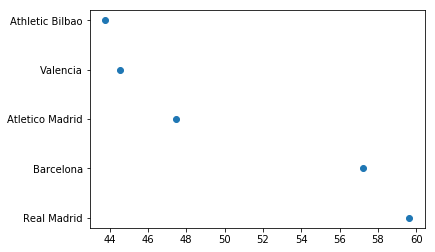

In [113]:
plt.scatter(laliga_win['Winning percentage'],laliga_win['Team'])

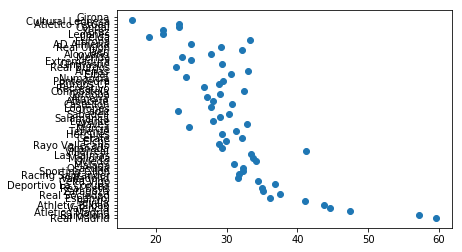

In [114]:
plt.scatter(laliga1['Winning percentage'],laliga1['Team'])

In [128]:
laliga1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 21 columns):
Pos                   61 non-null object
Team                  61 non-null object
Seasons               61 non-null object
Points                61 non-null object
GamesPlayed           61 non-null int32
GamesWon              61 non-null int32
GamesDrawn            61 non-null object
GamesLost             61 non-null object
GoalsFor              61 non-null object
GoalsAgainst          61 non-null object
Champion              61 non-null object
Runner-up             61 non-null object
Third                 61 non-null object
Fourth                61 non-null object
Fifth                 61 non-null object
Sixth                 61 non-null object
T                     61 non-null object
Debut                 61 non-null int64
Since/LastApp         61 non-null object
BestPosition          61 non-null object
Winning percentage    60 non-null float64
dtypes: float64(1), int32(2), int64(1)

Step 1: Defining Null and alternate hypothesis
    H0: There is no significance difference between winning winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.
    H1: There is a significance difference, i.e mean of winnig percentage of both teams is different.
Step 2: Defining Alpha
    alpha= 0.05
Step 3: Define the Test
Pop SD is not given which means t test
Sample Size is very les n=20

Sample Size is different for both the cases.

Hence, the T-test will be: Indepedent two sample

In [134]:
laliga_first=laliga_win.iloc[0:3,-1:]

In [135]:
laliga_last=laliga_win.iloc[3:7,-1:]

In [126]:
import scipy.stats as stats

In [136]:
stats.ttest_ind(laliga_first,laliga_last)

Ttest_indResult(statistic=array([3.69414781]), pvalue=array([0.01408477]))

Since P value is less than 0.05 hence we reject The Null hypothesis hence we can say that there is a significant difference observed in the winning percentage of two groups.

2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?
b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.
c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?
d)	Which of the two above intervals are wider?
e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.


In [137]:
n=200
xbar=140
sd=25


In [139]:
sem=sd/np.sqrt(200)

In [140]:
sem

1.7677669529663687

Subtract the standard error from the mean and record that number. Then add the standard
error to the mean and record that number. You have plotted mean± 1 standard error (S. E.),
the distance from 1 standard error below the mean to 1 standard error above the mean



In [141]:
h=140+1.76
l=140-1.76

In [142]:
print(h,l)

141.76 138.24


The range of the systolic Blood pressure is from 138.24 to 141.76.

In [150]:
n=100
xbar=140
sd=25
sem=sd/np.sqrt(n)


In [151]:
sem

2.5

In [152]:
h=140+2.5
l=140-2.5

In [153]:
print(h,l)

142.5 137.5


The range of the systolic Blood pressure is from 137.5 to 142.5 when the sample size is decreaded by 100.
Since this sample is smaller than 200, the SEM will be larger, as the sample size and sem are inversely proportional,
leading to a wider confidence interval. In non-mathematical terms, our sample contains
less information than a sample of 200 women, and therefore will yield
a less precise estimate of the population mean. 

Now as the sample size starts increasing it reaches or is almost closer to the size of the population. Hence the means of both the sample and the population has less difference hence the standard error of the means is less or starts decreasing as the sample size starts increasing.

3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?


In [154]:
golf=pd.read_csv("C:\\Users\\DELL\\Desktop\\PGPDSE\\Statistics\\golf.csv")

In [155]:
golf

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


Step 01: Define the null hypothesis:
        H0: There is no difference in the mean distances for the two models.
Step 02: Define the alternate hypothesis:
        H1: There is a difference in the mean distances for the two models.
Step 03: Degrees of freedom Within and Between
    DF between the groups: Between
    DF between points vs groups: Within
Step 04: Calculate the critical value and/or P value as well
Step 05: Find the test
The test we are using is the Ftest or ANOVA because Ftest value is the ratio of variance of the groups. hence hrough Ftest we will be able to identofy the effect of variance on the mean and hence we will be able to conclude whether there is change in the mean distances for the current and new balls or not..

In [157]:
k=2
dfn=2-1
dfd= len(golf['Current'])+len(golf['New'])-k

In [158]:
print("The degrees of freedom within is", dfd, "and degrees of freedom between is ", dfn)

The degrees of freedom within is 78 and degrees of freedom between is  1


In [159]:
cv= stats.f.ppf(q=1-0.05, dfn=1, dfd=78)

In [160]:
cv

3.9634720513960966

In [161]:
df1= pd.DataFrame({"Ball":"1","Distance":golf['Current']})
df2= pd.DataFrame({"Ball":"2","Distance":golf['New']})

In [162]:
Golf1=pd.DataFrame()
Golf1=Golf1.append(df1)
Golf1=Golf1.append(df2)

In [164]:
Golf1

,Ball,Distance
0,1,264
1,1,261
2,1,267
3,1,272
4,1,258
5,1,283
6,1,258
7,1,266
8,1,259
9,1,270


In [165]:
import statsmodels.api as sms
from statsmodels.formula.api import ols

In [166]:
model=ols("Distance~Ball", data=Golf1).fit() 

In [167]:
print(sms.stats.anova_lm(model))

            df     sum_sq     mean_sq         F    PR(>F)
Ball       1.0   154.0125  154.012500  1.764545  0.187932
Residual  78.0  6807.9750   87.281731       NaN       NaN


Since we have the F test statistics (1.76) less than the F critical value which is 3.96 and hence the test statistic lie in the acceptance region and hence we fail to reject the Null Hyp that means there is no difference in the mean distances for the two models.

Since the Pvalue is greater than 0.05 that is 5% hence we fail to reject the null hypothesis.

Hence the Management should introduce the cut-resistant, longer-lasting golf ball for increasing the Par’s market share.